# Mercari Price Suggestions - Exploratory Data Analysis and Text Preprocessing

## Contents

<ol>
    <li><b>Import Libraries</b></li>
    <li><b>Load Dataset</b></li>
    <li><b>Summary Statistics</b></li>
    <li><b>Data Cleaning</b></li>
    <li><b>Exploratory Data Analysis</b></li>
<ul><li>Observing target feature</li>
<li>Eliminating products which have price $0 </li>
<li>Analyze Distribution of shipping</li>
<li>Distribution of price based on shipping type</li>
<li>Mean Price for shipping type</li>
<li>Analyze Top 10 Categories</li>
<li>Implementing Feature Engineering</li>
<li>Top 10 Main Categories</li>
<li>Ratio of Main Categories</li>
<li>Analyzing Brands</li>
<li>Top 20 Expensive Brands</li>
<li>Analyzing relation between Length of Description and Price</li></ul>
<li><b>Text Processing</b></li>
<ul><li>List of Punctuations</li>
<li>List of Stop Words</li>
<li>Functions for Normalizing words</li>
<li>Applying Normalizing Functions</li>
</ul>
<li><b>Text Feature Extraction</b></li>
<ul><li> Word Frequency Weights</li>
<li>Encoding Categorical Variables</li>
<ul><li> Count Vectorizer</li>
<li> Label Binarizer</li>
<li>Get Dummies</li></ul>
<li>TF-IDF</li>
<ul><li>Observing TF-IDF Weights</li></ul>
<li>Combining all features into one merge</li></ul>
</ol>



## Import Libraries

In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.preprocessing import LabelBinarizer
from scipy.sparse import csr_matrix, hstack
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


## Load Dataset

In [2]:
# Loading dataset
train = pd.read_csv(r'C:\Users\Ojas\Desktop\Mercari Price Suggestions\Mercari Price Suggestions\train.tsv', sep = '\t')
test = pd.read_csv(r'C:\Users\Ojas\Desktop\Mercari Price Suggestions\Mercari Price Suggestions\test.tsv', sep = '\t')

In [3]:
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [4]:
# Exploring Training dataset
print(train.dtypes)

train_id               int64
name                  object
item_condition_id      int64
category_name         object
brand_name            object
price                float64
shipping               int64
item_description      object
dtype: object


In [5]:
print("Training data size is: " + str(train.shape))

Training data size is: (1482535, 8)


There are total 1482535 observations in the training dataset.

##  Summary Statistics

In [6]:
train.astype('object').describe().transpose()

,count,unique,top,freq
train_id,1482535,1482535,1482534,1
name,1482535,1225273,Bundle,2232
item_condition_id,1482535,5,1,640549
category_name,1476208,1287,"Women/Athletic Apparel/Pants, Tights, Leggings",60177
brand_name,849853,4809,PINK,54088
price,1.48254e+06,828,10,99416
shipping,1482535,2,0,819435
item_description,1482531,1281426,No description yet,82489


From the summary statistics we can observe that,
<ul>
<li>Most product prices are at $10</li>
<li>There are around 83000 items with no description</li>
<li>There are 4809 unique brands</li>
<li>There are majority of women's products</li></ul>

In [7]:
# Exploring testing data
test.head()

,test_id,name,item_condition_id,category_name,brand_name,shipping,item_description
0,0,"Breast cancer ""I fight like a girl"" ring",1,Women/Jewelry/Rings,NaN,1,Size 7
1,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers",1,Other/Office supplies/Shipping Supplies,NaN,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers Lined..."
2,2,Coach bag,1,Vintage & Collectibles/Bags and Purses/Handbag,Coach,1,Brand new coach bag. Bought for [rm] at a Coac...
3,3,Floral Kimono,2,Women/Sweaters/Cardigan,NaN,0,-floral kimono -never worn -lightweight and pe...
4,4,Life after Death,3,Other/Books/Religion & Spirituality,NaN,1,Rediscovering life after the loss of a loved o...


In [8]:
print("Test data size is: " + str(test.shape))


Test data size is: (693359, 7)


There are around 700,000 observations in the test dataset.

##  Data Cleaning 

In [9]:
train.isnull().sum()

train_id                  0
name                      0
item_condition_id         0
category_name          6327
brand_name           632682
price                     0
shipping                  0
item_description          4
dtype: int64

Brand name, category name and item description values are missing.

In [10]:
#Imputing missing values
def miss_val(data):
    data['category_name'].fillna(value = 'Other', inplace=True)
    data['brand_name'].fillna(value = 'Unknown', inplace=True)
    data['item_description'].fillna(value='No description available', inplace=True)
    return data

In [11]:
train = miss_val(train)
train.isnull().sum()

train_id             0
name                 0
item_condition_id    0
category_name        0
brand_name           0
price                0
shipping             0
item_description     0
dtype: int64

## Exploratory Data Analysis

### Observing the target feature (Price)

In [12]:
train['price'].describe()

count    1.482535e+06
mean     2.673752e+01
std      3.858607e+01
min      0.000000e+00
25%      1.000000e+01
50%      1.700000e+01
75%      2.900000e+01
max      2.009000e+03
Name: price, dtype: float64

Text(0.5, 1.0, 'Distribution of Price')

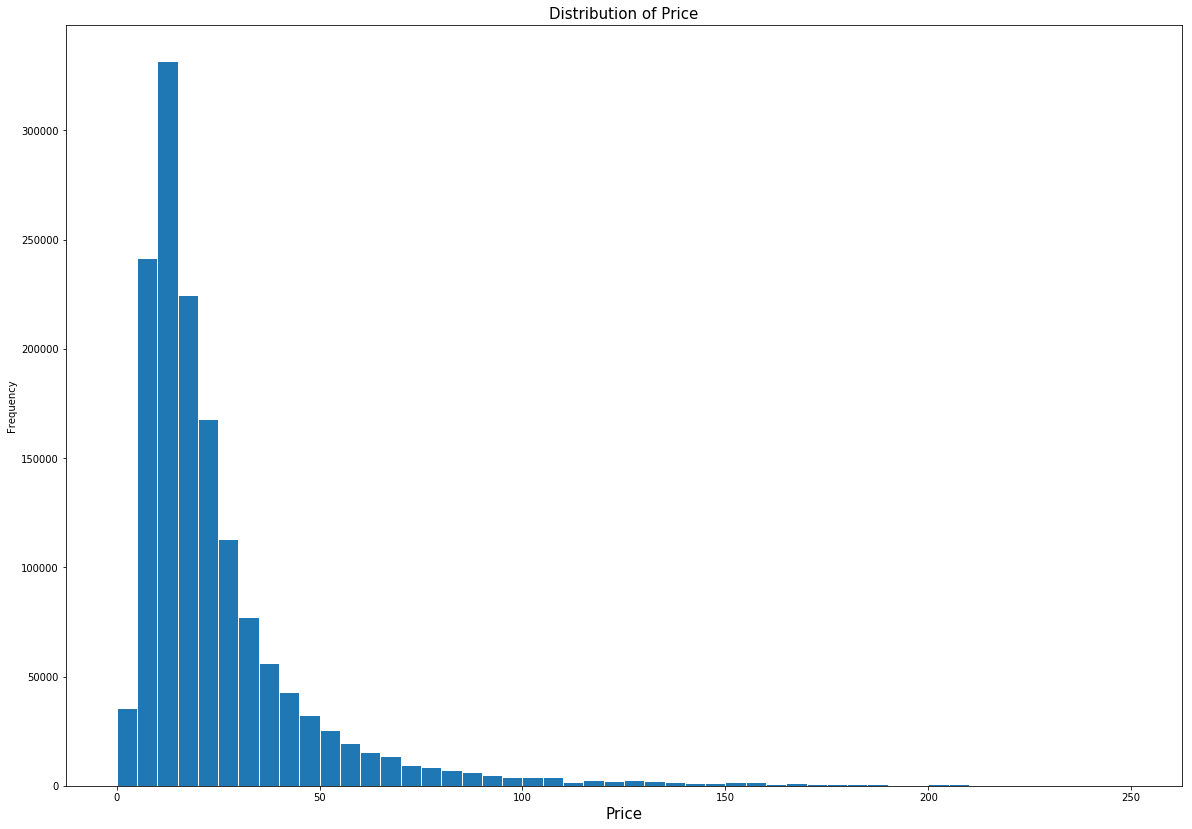

In [13]:
### Distribution of Price
plt.figure(figsize =(20,14))
(train['price']).plot.hist(bins=50, edgecolor='white', range=[0,250])
plt.xlabel('Price', fontsize=15)
plt.title('Distribution of Price', fontsize=15)

We can see that the price distribution is highly skewed. So we will apply log transformation to fix this skewness problem. Log transformation will convert its distribution to normal distribution.

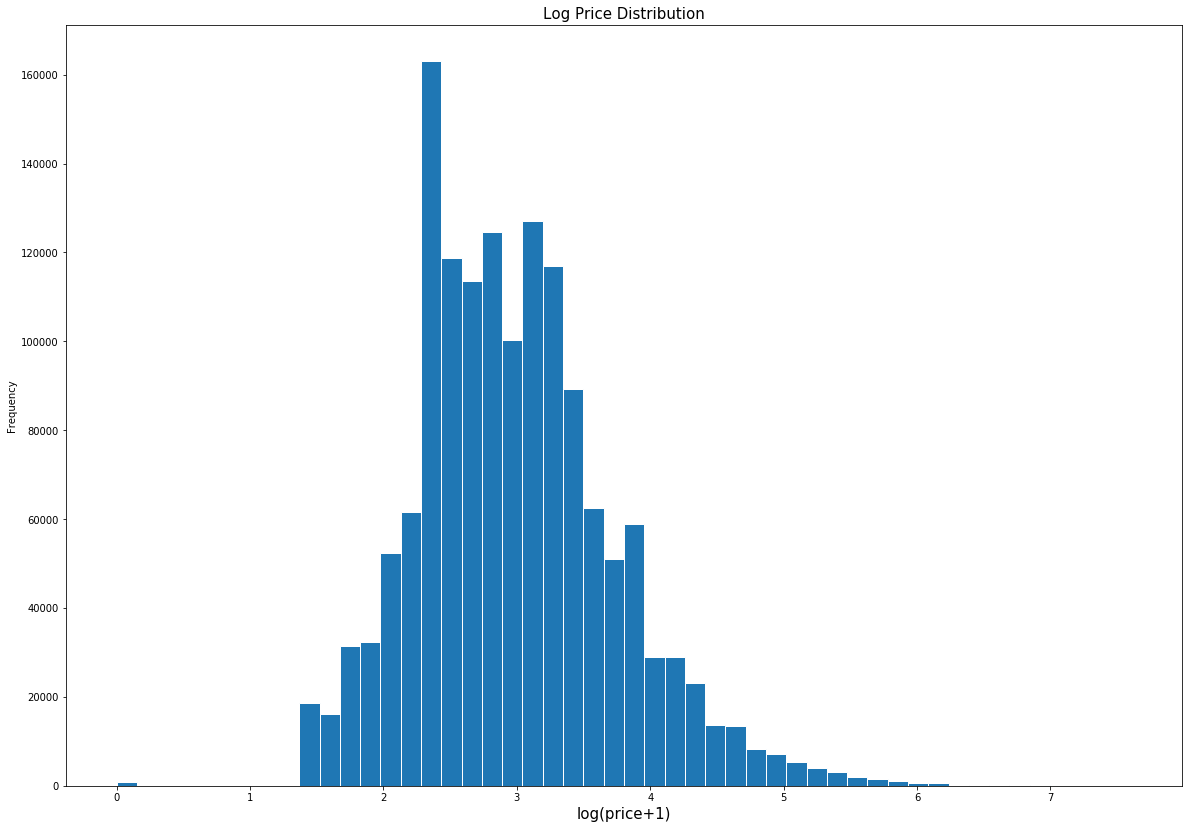

In [14]:
plt.figure(figsize=(20,14))
np.log(train['price']+1).plot.hist(bins=50, edgecolor ='white')
plt.xlabel('log(price+1)', fontsize =15)
plt.title('Log Price Distribution', fontsize=15)
plt.show()

### Eliminating products which have price $0

In [15]:
train[train['price']==0]

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
1325,1325,Alabama Crimson Tide Quality Lanyard,1,Sports & Outdoors/Fan Shop/NCAA,Unknown,0.0,1,TOP QUALITY THICK LANYARD Reversible sides wit...
2544,2544,Levi leggings,3,"Women/Jeans/Slim, Skinny",Levi's®,0.0,0,Light wash. Hardly worn. Size 24 but fits like...
2712,2712,Simple Red Lace Lingerie Top,3,Women/Underwear/G-Strings & Thongs,Unknown,0.0,0,"Very simple but cute, a little form fitting as..."
3576,3576,Turquoise 15 Pc Makeup Brush Set,1,Beauty/Tools & Accessories/Makeup Brushes & Tools,Unknown,0.0,1,1 left!
3761,3761,Girls size 7/8,3,Kids/Girls (4+)/Tops & T-Shirts,Unknown,0.0,1,5 pair gap jean excellent used condition 3 chi...
5237,5237,Nursing Bra,3,Women/Underwear/Bras,Motherhood Maternity,0.0,0,Used a few times but was not able to nurse
6175,6175,"Multi Listing Bundled Package, Thanks",2,Electronics/Media/DVD,Unknown,0.0,1,1)Large Collection of Full Length Strawberry S...
7116,7116,Nike Dri-Fit High Power Speed Tights,1,"Women/Athletic Apparel/Pants, Tights, Leggings",Nike,0.0,1,"Bought at Nike store in New York, Brand New, N..."
7622,7622,Hands free earpiece,1,Electronics/Cell Phones & Accessories/Headsets,Unknown,0.0,0,Wireless Bluetooth hands free used with Samsun...
10812,10812,Vampire candy bowl,1,Home/Seasonal Décor/Halloween,Unknown,0.0,0,New good condition for halloween


In [16]:
train[train['price']==0].shape

(874, 8)

 We have 874 items with price of $0. Let's eliminate them as it is a error.

In [17]:
train = train[train['price']!=0]
train.shape

(1481661, 8)

### Analyze distribution of shipping 

In [18]:
train['shipping'].value_counts() / len(train)

0    0.552674
1    0.447326
Name: shipping, dtype: float64

### Distribution of price based on shipping type

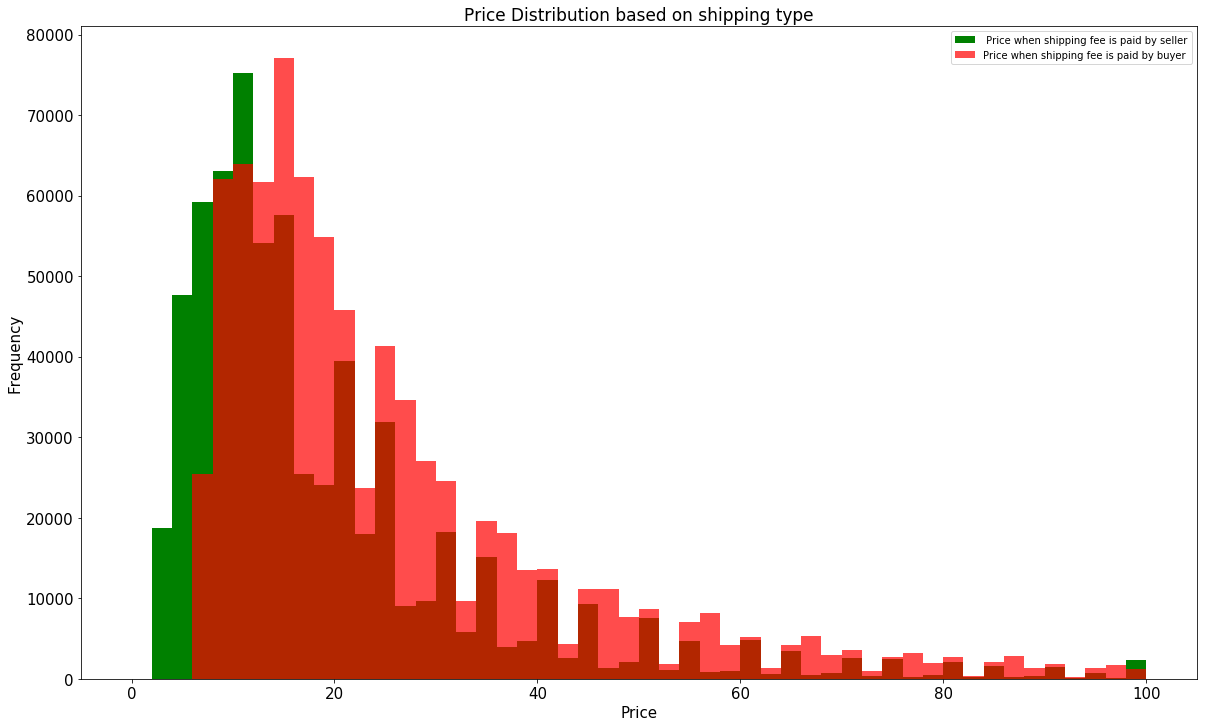

In [19]:
shipping_fee_by_buyer = train.loc[train['shipping']==0, 'price']
shipping_fee_by_seller = train.loc[train['shipping']==1, 'price']

fig, ax = plt.subplots(figsize= (20,12))

ax.hist(shipping_fee_by_seller, color='green', alpha=1.0, bins=50, range=[0,100], label =' Price when shipping fee is paid by seller')
ax.hist(shipping_fee_by_buyer, color ='red', alpha =0.7, bins=50, range=[0,100], label='Price when shipping fee is paid by buyer')

plt.xlabel('Price', fontsize= 15)
plt.ylabel('Frequency', fontsize=15)
plt.title("Price Distribution based on shipping type", fontsize =17)
plt.tick_params(labelsize=15)
plt.legend()
plt.show()

From the above visualization, we can conclude that price of the product is greater when seller pays shipping costs.

### Mean Price for Shipping Type

In [20]:
print('The mean price is ${}'.format(round(shipping_fee_by_seller.mean(), 2)), 'if seller pays shipping')
print('The mean price is ${}'.format(round(shipping_fee_by_buyer.mean(), 2)), 'if buyer pays shipping')

The mean price is $22.58 if seller pays shipping
The mean price is $30.13 if buyer pays shipping


### Analyze the Top 10 categories

In [21]:
top_10_cat = train['category_name'].value_counts()[:10].reset_index()
top_10_cat

,index,category_name
0,"Women/Athletic Apparel/Pants, Tights, Leggings",60152
1,Women/Tops & Blouses/T-Shirts,46349
2,Beauty/Makeup/Face,34320
3,Beauty/Makeup/Lips,29901
4,Electronics/Video Games & Consoles/Games,26547
5,Beauty/Makeup/Eyes,25200
6,"Electronics/Cell Phones & Accessories/Cases, C...",24668
7,Women/Underwear/Bras,21254
8,"Women/Tops & Blouses/Tank, Cami",20270
9,Women/Tops & Blouses/Blouse,20269


In [22]:
### Distribution of top 10 categories

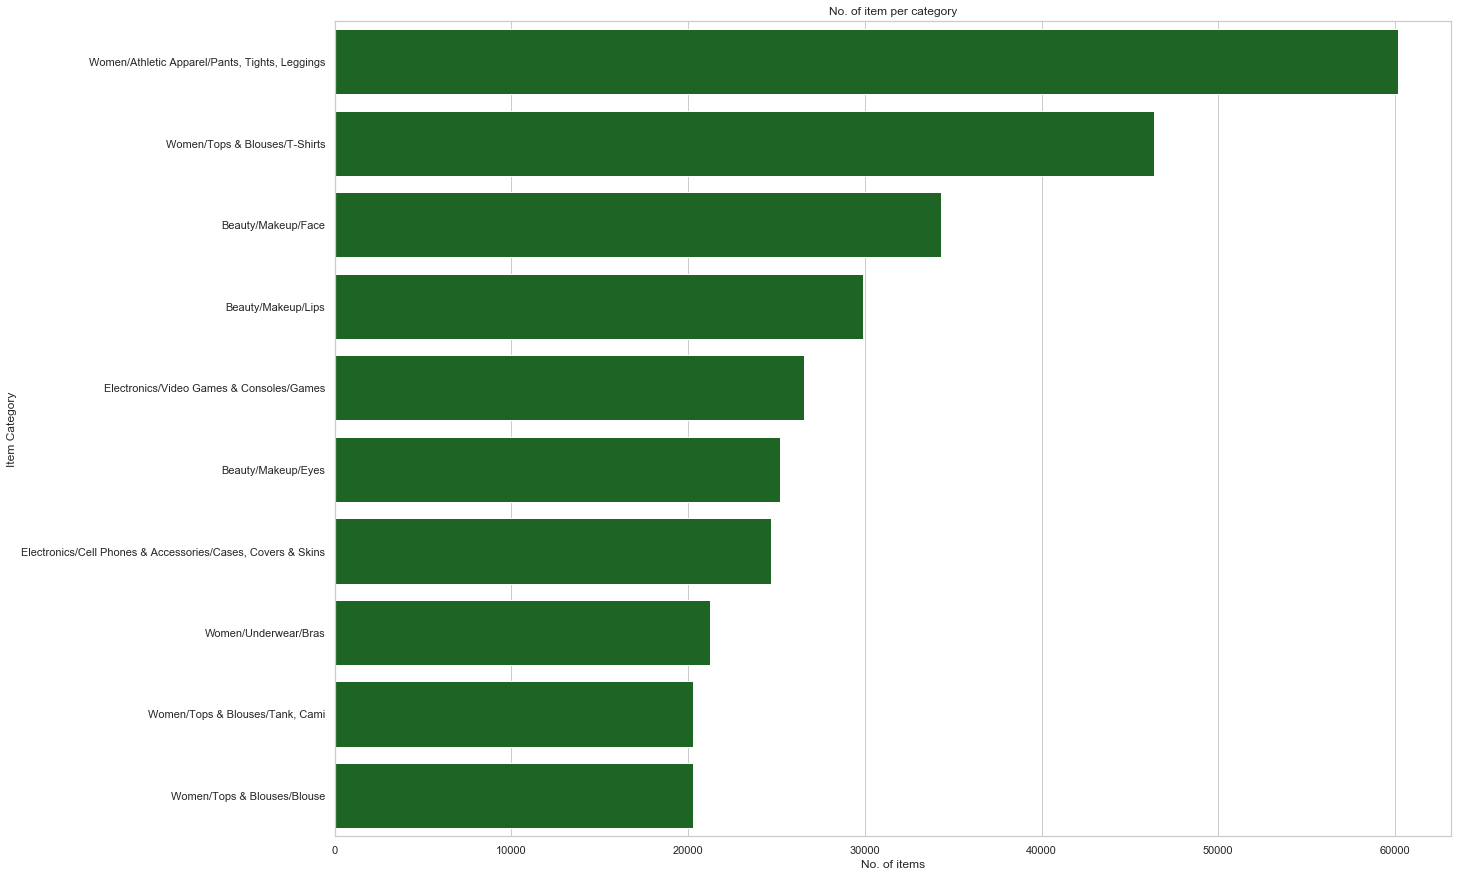

In [23]:
top_10_cat = train['category_name'].value_counts()[:10].reset_index()
sns.set(style='whitegrid')

### Initializing the figure and setting the figure parameters
f, ax = plt.subplots(figsize=(20,15))
sns.set_color_codes("dark")
sns.barplot(x='category_name', y='index', data=top_10_cat, label=' No. of items', color='g')
ax.set(ylabel= "Item Category", title = "No. of item per category", xlabel="No. of items")
plt.show()

### Implementing Feature Engineering

There's a format in the category feature of this training dataset i.e. **Root Category/Category/Subcategory**. Therefore, we will split the category and save each of them in a separate column.

In [24]:
### Creating new category features
def convert_category_name(category_name):
    try:
        main, sub1, sub2 =category_name.split('/')
        return main, sub1, sub2
    except:
        return 'Other', 'Other', 'Other'

In [25]:
train['category_main'], train['category_sub1'], train['category_sub2']= zip(*train['category_name'].apply(convert_category_name)) 
cat_train = train[['category_main', 'category_sub1', 'category_sub2','price']]
cat_train.head()

,category_main,category_sub1,category_sub2,price
0,Men,Tops,T-shirts,10.0
1,Electronics,Computers & Tablets,Components & Parts,52.0
2,Women,Tops & Blouses,Blouse,10.0
3,Home,Home Décor,Home Décor Accents,35.0
4,Women,Jewelry,Necklaces,44.0


### Top 10 Main Categories

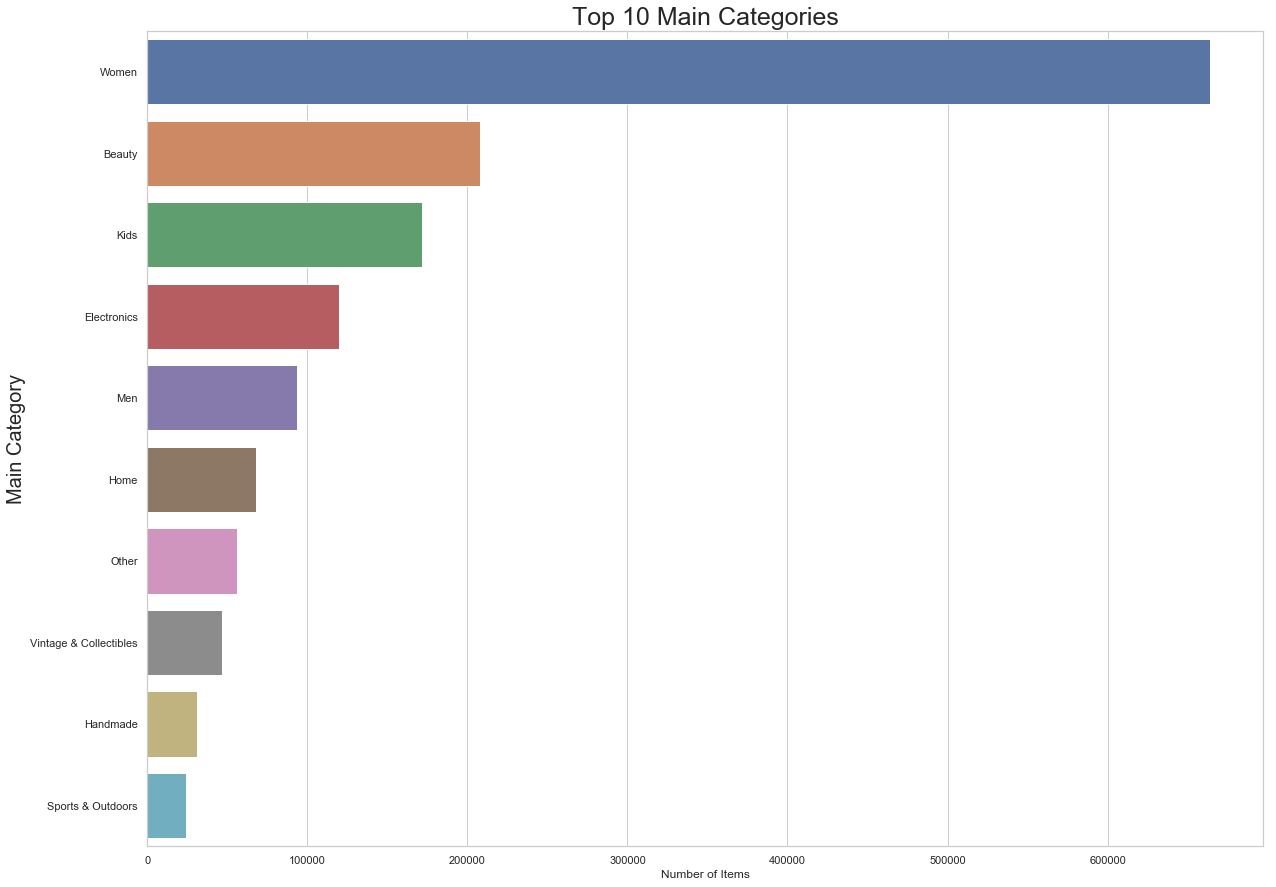

In [26]:
plt.figure(figsize=(20,15))
sns.countplot(y = train['category_main'], order = train['category_main'].value_counts().index, orient = 'v')
plt.title('Top 10 Main Categories', fontsize = 25)
plt.ylabel('Main Category', fontsize = 20)
plt.xlabel('Number of Items')
plt.show()

Majority of the items are women and beauty products . Its interesting because it allows us to know who the users are and the company can perform some sort of targeted marketing. 

### Ratio of Main Categories

In [27]:
train['category_main'].value_counts()/len(train)

Women                     0.448139
Beauty                    0.140197
Kids                      0.115786
Electronics               0.080705
Men                       0.062964
Home                      0.045780
Other                     0.037814
Vintage & Collectibles    0.031397
Handmade                  0.020810
Sports & Outdoors         0.016408
Name: category_main, dtype: float64

### Analyzing Brands

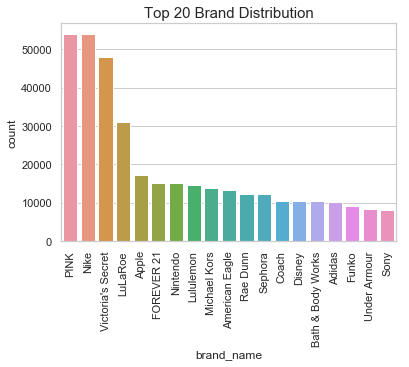

In [29]:
# Top 20 Brands
top_20_brands = train['brand_name'].value_counts()[1:20].reset_index().rename(columns={'index': 'brand_name', 'brand_name':'count'})
ax = sns.barplot(x="brand_name", y="count", data=top_20_brands)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title('Top 20 Brand Distribution', fontsize=15)
plt.show()

### Top 20 Expensive Brands

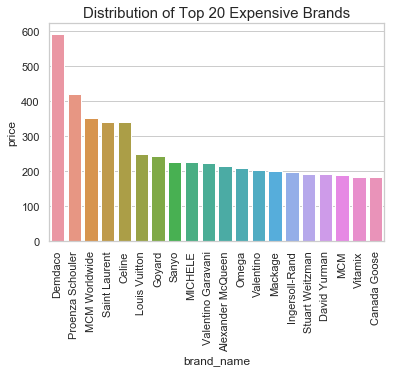

In [30]:
top_20_exp_brand = pd.DataFrame(train.groupby(['brand_name'],as_index=True).std().price.sort_values(ascending=False)[0:20]).reset_index()
ax = sns.barplot(x="brand_name", y="price", data=top_20_exp_brand)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title('Distribution of Top 20 Expensive Brands', fontsize=15)
plt.show()

### Analyzing relation between Length of Description and Price

In [31]:
train['item_description'] = train['item_description'].astype(str)
des = train[['name','item_description', 'price']]
des['count']= des['item_description'].apply(lambda x : len(str(x)))
des.head()


C:\Users\Ojas\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,name,item_description,price,count
0,MLB Cincinnati Reds T Shirt Size XL,No description yet,10.0,18
1,Razer BlackWidow Chroma Keyboard,This keyboard is in great condition and works ...,52.0,188
2,AVA-VIV Blouse,Adorable top with a hint of lace and a key hol...,10.0,124
3,Leather Horse Statues,New with tags. Leather horses. Retail for [rm]...,35.0,173
4,24K GOLD plated rose,Complete with certificate of authenticity,44.0,41


In [32]:
df = des.groupby('count')['price'].mean().reset_index()
df.head()

,count,price
0,1,19.542208
1,2,23.031111
2,3,22.186764
3,4,23.974603
4,5,21.798916


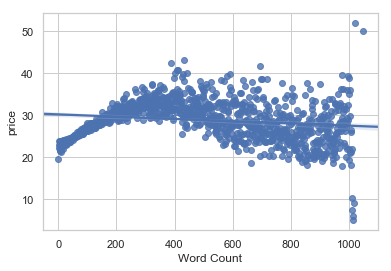

In [33]:
sns.regplot(x=df['count'], y=df['price'])
plt.xlabel("Word Count")
plt.show()

## Text Processing

We will perform the following techniques to normalize the text :
<ul>
<li>Eliminating Punctuations</li>
<li>Removing Stop words</li>
<li>Converting words to lowercase</li>
<li>Stemming the words</li></ul>

### List of Punctuations

In [34]:
from string import punctuation
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [35]:
# Creating a list for replacing punctuations
punc_symbols = []
for symbol in punctuation:
    punc_symbols.append((symbol,''))
    
print(punc_symbols)

[('!', ''), ('"', ''), ('#', ''), ('$', ''), ('%', ''), ('&', ''), ("'", ''), ('(', ''), (')', ''), ('*', ''), ('+', ''), (',', ''), ('-', ''), ('.', ''), ('/', ''), (':', ''), (';', ''), ('<', ''), ('=', ''), ('>', ''), ('?', ''), ('@', ''), ('[', ''), ('\\', ''), (']', ''), ('^', ''), ('_', ''), ('`', ''), ('{', ''), ('|', ''), ('}', ''), ('~', '')]


### List of Stop Words

In [36]:
# Observing list of stop words
#import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

### Functions for Normalizing words

In [37]:
import string

#Creating function for eliminating punctuations
def remove_punc(sentence:str) -> str:
    return sentence.translate(str.maketrans('','', string.punctuation))

# Creating function for removing stop words
def remove_stop_words(x):
    x= ' '.join([i for i in x.lower().split(' ') if i not in stop])
    return x

# Creating function for converting words to lowercase
def lowercase(x):
    return x.lower()

### Applying Normalizing Functions

In [38]:
#Stemming words
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
train['item_description'] = train['item_description'].apply(porter.stem)
train['item_description'] = train['item_description'].apply(remove_punc)
train['item_description'] = train['item_description'].apply(remove_stop_words)
train['item_description'] = train['item_description'].apply(lowercase)

train['name'] = train['name'].apply(remove_punc)
train['name'] = train['name'].apply(remove_stop_words)
train['name'] = train['name'].apply(lowercase)

## Text Feature Extraction

<li><b>Feature Pre-Processing:</b> Sometimes we can't just fit a dataset into your model and expect good results. Each type of feature has their own way of preprocessing. Choice of preprocessing method also depends on the model we are trying to use.

Since we're working with Text Features, we're going to do a lot of vectorization:

<li><b>Tokenization:</b> Here, we split each text into words (bag of words model)</li>
<li><b>Stemming:</b> Removing word inflections (getting the root word)
<li><b>Vectorization:</b> reducing text into a vector with different types of frequencies for each word (Count Values or TF-IDF Values)</li>


<b>Bag of Words:</b>
When we vectorize these words, we're doing creating a feature for each word. Also known as, Bag of Words. We lose word ordering.</li>

<li><b>Solution:</b> To preserve some ordering, we can introduce n-grams into our vectorization of words (problem: too many features)
one way to reduce dimensions of n-grams is to remove stop words (a, the, is)</li>
<ul><li><b>Stop words:</b> We can remove these words becaues they are just there for grammatical structure with little to no meaning.</li>
    <li><b>N-gram:</b> with smaller frequencies can highlight and capture important parts of a document/text. This helps  to preserve local ordering and can improve model performance.</li>

In [39]:
# Observing the normalized ite description feature
train['item_description'][115:125]

115                never worn brown leather strap wedges
116                  boys lebron soldier 9s great condit
117                                      description yet
118    bombshell  eau sexy bombshell used bit lots pr...
119    victorias secret pink black zip hoodie gently ...
120    sweater like long sleeved shirt glows dark pur...
121    tens 3000 back pain would great new without bo...
122         sizes info clothes found individual postings
123    white xl dress built bra strapless ties around...
124    miss style name skinny size 26 inseam 32 miss ...
Name: item_description, dtype: object

In [40]:
#nltk.download('punkt')
from nltk.tokenize import word_tokenize
text = train['item_description'][120]
tokens = word_tokenize(text)
print(tokens)

['sweater', 'like', 'long', 'sleeved', 'shirt', 'glows', 'dark', 'purchased', 'another', 'seller', 'didnt', 'fit', 'says', 'size', 'would', 'put']


### Word Frequency Weights
Each word in our feature space can have different frequency weights
<ul>
    <li>Frequency Weight</li>
    <li>TF-IDF Weight</li>
    <li>Binary</li></ul>
    
<b>CountVectorizer:</b> Returns an encoded vector with integer count for each word.

<b>TF-IDF(min_df, max_df, n-gram):</b> Returns encoded vector with weighted count for each word (utilizes the word in the document in corresponsdence to the whole corpus, to keep it short, more emphasis on the rarity of a word). This is good because we want to find frequent terms from that document that isn't so frequent within the whole document corpus.

<b>LabelBinarizer:</b> Get's all the word and assigns it to its own column. 0 means it's there and 1 means not (example with brand names)

<b>Why are we doing this again?:</b> Because some Machine Learning models don't recognize text as well. You're going to have to convert it into numbers

In [41]:
# Observing features
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,category_main,category_sub1,category_sub2
0,0,mlb cincinnati reds shirt size xl,3,Men/Tops/T-shirts,Unknown,10.0,1,description yet,Men,Tops,T-shirts
1,1,razer blackwidow chroma keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,keyboard great condition works like came box p...,Electronics,Computers & Tablets,Components & Parts
2,2,avaviv blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,adorable top hint lace key hole back pale pink...,Women,Tops & Blouses,Blouse
3,3,leather horse statues,1,Home/Home Décor/Home Décor Accents,Unknown,35.0,1,new tags leather horses retail rm stand foot h...,Home,Home Décor,Home Décor Accents
4,4,24k gold plated rose,1,Women/Jewelry/Necklaces,Unknown,44.0,0,complete certificate authent,Women,Jewelry,Necklaces


## Encoding Categorical Variables
<ul>
    <li>name</li>
 <li>brand_name</li>
 <li>category_main, category_sub1, category_sub2</li>
 <li>item_description</li>
 <li>shipping</li>
 <li>item_condition_id</li></ul>

### Count Vectorizer

In [42]:
cv= CountVectorizer(min_df=10)
x_name = cv.fit_transform(train['name'])
x_cat_main = cv.fit_transform(train['category_main'])
x_cat_sub1 = cv.fit_transform(train['category_sub1'])
x_cat_sub2 = cv.fit_transform(train['category_sub2'])

In [43]:
print("Shape of Item Name: "+ str(x_name.shape))
print("Shape of Category Main:" + str(x_cat_main.shape))
print("Shape of Category Sub1:" + str(x_cat_sub1.shape))
print("Shape of Category Sub2:" + str(x_cat_sub2.shape))

Shape of Item Name: (1481661, 18310)
Shape of Category Main:(1481661, 12)
Shape of Category Sub1:(1481661, 141)
Shape of Category Sub2:(1481661, 805)


### Label Binarizer

In [44]:
# Applying Label Binarizer to "brand_name" feature
lab= LabelBinarizer(sparse_output=True)
x_brand = lab.fit_transform(train['brand_name'])
print("Shape of Brand Name: "+ str(x_brand.shape))

Shape of Brand Name: (1481661, 4808)


### Get Dummies

In [45]:
# Applying get_dummies to "item_condition_id" and "shipping" and then converting it into a CSR Matrix
x_dummies = csr_matrix(pd.get_dummies(train[['item_condition_id', 'shipping']], sparse =True).values)

## TF-IDF

<b>Goal:</b> Measure hwo important a word or phrase is within a collection of documents. It essentially weigh down terms that appear frequently and scale up unique terms.

<b>TF Term Frequency: </b> How often a term occurs

<b>IDF Inverse Document Frequency:</b> how important a term is

<b>Important Parameters</b>
<ol>
    <li>ngram_range</li>
<li>stop_words</li>
<li>lowercase</li>
<li>max_df - max threshold that will ignore a term that has a document frequency higher than the threshold</li>
<li>min_df - min threshold that will ignore a term that has a document frequency lower than the threshold</li>
<li>max_features - gets the assigned amount of features with highest amount of term frequencies (scores)</li></ol>


In [46]:
# Perform a TFIDF Transformation of the item description with the top 55000 features and has an n-gram range of 1-2
tf = TfidfVectorizer(max_features = 55000, ngram_range=(1,2), stop_words ='english')
x_description= tf.fit_transform(train['item_description'])

In [47]:
print("Shape of Item Description: " + str(x_description.shape))

Shape of Item Description: (1481661, 55000)


### Observing TF-IDF Weights

In [48]:
# Creating a dictionary which will map the tokens to their tf-idf values
tfidf= dict(zip(tf.get_feature_names(), tf.idf_))
tfidf = pd.DataFrame(columns=['tfidf']).from_dict(dict(tfidf),orient= 'index')
tfidf.columns = ['tfidif']


In [49]:
#Lowest TFIDF scores
tfidf.sort_values(by=['tfidif'],ascending=True).head(10)

,tfidif
new,2.187014
size,2.347269
brand,2.758962
brand new,2.883607
condition,2.925553
free,2.930798
worn,3.111408
used,3.220149
shipping,3.225996
great,3.347702


In [50]:
#Highest TFIDF scores
tfidf.sort_values(by=['tfidif'],ascending=False).head(10)

,tfidif
beats beats,13.011450
evod pro,12.723768
shipped containers,12.436086
3b,12.375462
pairrm pairrm,12.375462
ijust,12.264236
wide weft,12.212943
3ml teeth,12.164153
guards shade,12.164153
led teeth,12.117633


### Combining all features into one merge


In [51]:
comb_merge= hstack((x_dummies, x_description, x_brand, x_name,x_cat_main, x_cat_sub1, x_cat_sub2)).tocsr()

In [52]:
comb_merge.shape

(1481661, 79078)